**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Thadius Freebourn
- Yijun Luo
- Eve Nguyen
- Kiko Pan
- Qingtong Zou

# Research Question

What is the relationship between performance of student-athletes at UCSD as well as their academic interests (STEM vs non-STEM) and physical measurements (height/weight)? How do these relationships vary across genders? 

## Background and Prior Work

Participating in extracurricular activities while balancing school can be challenging. Student-athletes generally have a busier schedule than most students. They have to juggle and coordinate their training schedules, assignment deadlines, class attendance, and more. We recognize that the academic workload on STEM majors is generally more extensive than non-STEM majors. Given this, we wanted to explore whether or not academic pursuits correlate with athletic performance. Specifically, we aim to investigate if there are differences in performance between STEM and non-STEM majors at UCSD given its heavy STEM influence.

In a study that investigates the relationship between athletic identity and the selection of academic majors among college student-athletes, they found that students who care more about sports generally choose a major with decreased academic rigor. Based on the findings from this study, we can assume that there is likely a positive correlation between athletic performance and non-STEM majors at UCSD. This correlation suggests that high-performing student-athletes might lean towards majors that offer more flexibility and less academic pressure. This allows them to manage their training and game schedules more effectively. Students who prioritize their sports success are more likely to choose a major that aligns and simply helps them meet the academic requirements. This assumption should be consistent across all genders.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)

In addition, we wanted to study how athletes' physical measurements such as their height and weight affect their performance. In further research, we looked into gender differences in terms of physical variances. Men are generally considered more powerful and have more strength compared to women because they have larger muscle mass and lower body fat. Also, men are taller and have longer limbs compared to women. With all this considered, men have a physical advantage in sports where strength and height are used. Despite efforts to promote gender equality in sports, these biological differences continue to shape athletic outcomes. Given that men generally have greater physical strength, height, and muscle mass compared to women, it is reasonable to assume that these differences may influence athletic performance outcomes, especially in sports that heavily rely on strength and height.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)

Expanding on prior research, our study intends to explore multifaceted connections between athletic performance, physical attributes (height/weight), and academic preferences among those participating in basketball, soccer, volleyball, and water polo. We aim to investigate how these variables interrelate with performance rates across genders at UCSD. By analyzing these relationships, we aim to identify which factors most strongly correlate with higher athletic performance among male and female student-athletes at UCSD.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Foster, S. J. L., & Huml, M. R. (2017). The Relationship Between Athletic Identity and Academic Major Chosen by Student-Athletes. International journal of exercise science, 10(6), 915–925. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5685074/ 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Vealey, R. & Chase, M. (2016). Best Practice for Youth Sport. https://us.humankinetics.com/blogs/excerpt/reasons-for-gender-differences-in-youth-sport 


# Hypothesis


Our team hypothesizes that at UCSD, student-athletes from non-STEM fields and those with advantageous physical measurements (notably greater height and weight) tend to show enhanced sports performance, irrespective of gender. This pattern is anticipated due to the lower academic workload associated with non-STEM disciplines, allowing for more intensive training, and the natural advantage provided by superior physical attributes in athletic activities. We expect these relationships to be consistent across both male and female athletes, suggesting that the impact of academic interests and physical measurements on sports performance does not vary significantly by gender.

# Data

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data overview

**Dataset #1:** Anonymized Athlete Bio Data from UCSD Sports Department

- UCSD Athletics Particpant and Major Data
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/UCSD%20Athletics%20Particpant%20and%20Major%20Data.xlsx)
  - 7779 Observations
  - 10 Variables: Participant ID, Grad. Year, Gender, Sport, Transfer, Height, Weight, Academic Department, Major, Minor.

Dataset 1 includes an anonymized roster of UCSD student-athletes information. It includes a unique identifier for each participant, their expected graduation year, gender (M or F), the type of sport they are involved in, whether or not they are a transfer (True or False), students' heights, students' weights, their college within UCSD, their major, and minor if declared. These variables provide insights into the demographics, academic affiliations, and physical attributes of the student-athletes. To clean up this dataset, we will begin by converting height into centimeters to standardize measurement. Also, since there are duplicates of academic department with different references, we will consolidate this and standardize the names for the colleges. Students' majors and demographic information (weight and height) are important variables of this dataset because it will help address and establish the physical measurements and academic interest relationships of our research question. 

---

**Dataset #2:** Athlete Bio Data by Web Scraping
<details>
<summary>8 Datasets Scrapped</summary>

- UCSD Men's Basketball
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/male_basketball_rosters.csv)
  - 294 Observations
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool.
- UCSD Men's Soccer
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/male_soccer_rosters.csv)
  - 492 Observations
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool.
- UCSD Men's Volleyball
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/male_volleyball_rosters.csv)
  - 304 Observations 
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool. 
- UCSD Men's Waterpolo 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/male_waterpolo_rosters.csv)
  - 472 Observations 
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool. 
- UCSD Women's Basketball
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/female_basketball_rosters.csv)
  - 288 Observations 
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool. 
- UCSD Women's Soccer 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/female_soccer_rosters.csv)
  - 512 Observations 
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool. 
- UCSD Women's Volleyball
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/female_volleyball_rosters.csv)
  - 285 Observations 
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool. 
- UCSD Women's Water Polo 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/athlete_bio/female_waterpolo_rosters.csv)
  - 361 Observations
  - 9 Variables: Year, JerseyNum, Name, Position, Height, Weight, Major, Class, HomeTownHighSchool.
</details>
Dataset 2 was web scraped from the UCSD athletics website and ranges from the years 2024 - 2005 or 2006, as available. It contains student athlete's biographical information for both women's and men's basketball, soccer, volleyball, and water polo. This data includes the year, athlete's jersey numbers, student names, the position they play, their height, weight, major, year in school, hometown school, sport they play, and gender. These metrics provide insights into the demographics, physical attributes, academic interests, and athletic positions of the student-athletes. For data wrangling, we will combine these 8 datasets into one, write functions to standardize height into centimeters, possibly separate the “HomeTownHighSchool” column into two columns, transform the “Class” column to integers, and add a column indicating gender. The most important variable is, as our hypothesis is testing the correlation between major and performance.
---

**Dataset #3:** Athlete Performance Data by Web Scraping

<details>
<summary>Basketball Performance Datasets</summary>
    
- UCSD Men's Basketball Performance
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/men%20basketball.xlsx)
  - 106 Observations
  - 24 Variables: #, Player, GP-GS, MIN, AVG, FG FG-FGA, FG%, 3PT 3FG-FGA, 3FG%, FT FT-FTA, FT%, OFF, Rebounds DEF, Rebounds TOT, AVG, PF, DQ, A, TO, BLK, STL, PTS, AVG, Year
- UCSD Women's Basketball Performance
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/women%20basketball.xlsx)
  - 193 Observations
  - 24 Variables: #, Player, GP-GS, MIN, AVG, FG FG-FGA, FG%, 3PT 3FG-FGA, 3FG%, FT FT-FTA, FT%, OFF, Rebounds DEF, Rebounds TOT, AVG, PF, DQ, A, TO, BLK, STL, PTS, AVG, Year
</details>

<details>
<summary>Soccer Performance Datasets</summary>
    
- UCSD Men's Soccer Performance 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/men%20soccer.xlsx)
  - 184 Observations
  - 14 Variables: #, Player, GP, G, A, PTS, SH, SH%, SOG, SOG%, YC-RC, GW, PK-ATT, and Year
- UCSD Women's Soccer Performance
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/women%20soccer.xlsx)
  - 268 Observations
  - 13 Variables: #, Player, GP, G, A, PTS, SH, SH%, SOG, SOG%, GW, PK-ATT, Year
  - 24 Variables: #, Player, GP-GS, MIN, AVG, FG FG-FGA, FG%, 3PT 3FG-FGA, 3FG%, FT FT-FTA, FT%, OFF, Rebounds DEF, Rebounds TOT, AVG, PF, DQ, A, TO, BLK, STL, PTS, AVG, Year
</details>  


<details>
<summary>Volleyball Performance Datasets</summary>
    
- UCSD Men's Volleyball 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/men%20volleyball.xlsx)
  - 130 Observations
  - 24 Variables: #, Player, SP, K,	K/S, Attack E, Attack TA, Pct, Set A,	Set A/S, SA, Serve
SE, SA/S,	RE, DIG, Dig DIG/S, BS, BA, Blocking BLK, Blocking BLK/S, BE, BHE, PTS, and Year
- UCSD Women's Volleyball
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/women%20volleyball.xlsx)
  - 116 Observations
  - 24 Variables: #, Player, SP, K,	K/S, Attack E, Attack TA, Pct, Set A,	Set A/S, SA, Serve
SE, SA/S,	RE, DIG, Dig DIG/S, BS, BA, Blocking BLK, Blocking BLK/S, BE, BHE, PTS, and Year
</details>  


<details>
<summary>Water Polo  Performance Datasets</summary>
    
- UCSD Men's Water Polo 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/men%20waterpolo.xlsx)
  - 73 Observations
  - 14 Variables: #, Player, GP, SH, G, A, PTS, SH%, EX, DEX, STL, FB, Sprint, and Year
- UCSD Women's Water Polo 
  - [Link](https://github.com/COGS108/Group133_WI24/blob/4c1ffaf6f19e01eafe0f3905d92569fba29c81a8/data/performance_data/excel_condensed/women%20waterpolo.xlsx)
  - 43 Observations 
  - 14 Observations: #, Player, GP, SH, G, A, PTS, SH%, EX, DEX, STL, FB, Sprint, and Year
</details>  
Dataset 3 was also web scraped from the UCSD athletics website and ranges from the years 2024 - 2014, as available. It contains performance data from women's and men's sports. The sports include: basketball, soccer, volleyball, and water polo. Each data set has different variables that correlate best with the sport statistics. All of the integer variables that give the athletes’ statistics are important, as we will eventually combine these stats to determine a player’s overall performance, which will help us answer our research question. This overall performance score will allow us to combine the datasets and compare between athletes in different sports. Since currently we have 2 datasets (men and women) for each sports, we will combine two sex together into one datasets in the data wrangling.

---
With the three datasets, we plan on merging the data using student identifiers like their names and compare atheletes within different sports.  Since dataset 1 does not include student names, we will need to find a way to merge this with dataset 2 and 3. The overall performance score we find from dataset 3 will allow us to combine the datasets and compare between athletes in different sports.

## Dataset #1 (Anonymized Athlete Bio Data from UCSD Sports Departmennt)

In [56]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
athlete_bio_ucsd = pd.read_excel('data/athlete_bio/UCSD Athletics Particpant and Major Data.xlsx')
athlete_bio_ucsd

,Participant ID,Grad. Year,Gender,Sport,Transfer,Height,Weight,Academic Department,Major,Minor
0,1,2027,M,Swimming & Diving,False,"5' 11.75""",170.0,EARL WARREN COLLEGE,Mathematics/Applied Science,NaN
1,2,2027,M,Swimming & Diving,False,"5' 11""",170.0,SEVENTH COLLEGE,Human Biology,NaN
2,3,2027,F,Swimming & Diving,False,"5' 7""",0.0,ELEANOR ROOSEVELT (FRMLY FIFTH),Molecular and Cell Biology,NaN
3,4,2027,F,Swimming & Diving,False,"5' 10""",0.0,SEVENTH COLLEGE,Human Biology,NaN
4,5,2027,M,Swimming & Diving,False,"5' 9""",150.0,EARL WARREN COLLEGE,Aerospace Engineering,NaN
...,...,...,...,...,...,...,...,...,...,...
7774,7775,2014,F,Women's Tennis,False,0',0.0,REVELLE,MA27 Appld Math,Political Science
7775,7776,2014,F,Women's Tennis,False,0',0.0,THRGD MARSHALL,CM26 Communic,Business
7776,7777,2014,M,Track & Field,False,0',195.0,THRGD MARSHALL,EN25 Economics,NaN
7777,7778,2013,F,Women's Volleyball,False,0',0.0,EARL WARREN,SE27 Struct Eng,NaN


In [57]:
athlete_bio_ucsd['Height'].unique()

array(['5\' 11.75"', '5\' 11"', '5\' 7"', '5\' 10"', '5\' 9"', '6\' 3"',
       '6\' 2"', "6'", '6\' 1"', '5\' 8"', '5\' 5"', '5\' 6"', nan,
       '5\' 2"', '6\' 8"', '6\' 4"', '6\' 6"', '0\' 5.3"', '5\' 10.75"',
       '6\' 4.5"', '0\' 6.2"', '5\' 4"', '67\' 5"', '6\' 7"', '5\' 10.5"',
       '14\' 5"', '5\' 11.5"', '5\' 3"', '5\' 9.5"', '0\' 6"', '6\' 5"',
       '6\' 5.5"', '6\' 9"', '5\' 1.2"', '6\' 3.5"', "5'", '6\' 2.5"',
       '0\' 6.1"', '16\' 1"', '5\' 11.4"', '42\' 5"', '16\' 6"', '5\' 1"',
       '0\' 5"', '6\' 1.5"', '15\' 3"', '0\' 5.1"', '0\' 6.02"',
       '5\' 8.5"', '4\' 11"', '0\' 5.9"', '14\' 7"', '5\' 5.5"',
       '0\' 5.11"', '5\' 10.8"', '6\' 0.5"', "0'", '6\' 1.75"',
       '5\' 1.5"', '42\' 7"', '0\' 5.4"', '0\' 4.2"', '42\' 6"',
       '5\' 4.75"', '0\' 5.8"', '0\' 6.7"', '0\' 6.3"', '0\' 6.05"',
       '0\' 5.5"', '0\' 5.6"', '0\' 6.01"', '15\' 11"', '13\' 7"',
       '0\' 6.5"', '4\' 9"', '5\' 8.25"', '0\' 6.04"', '15\' 2"',
       '4\' 7"', '0\' 5.04"', '

In [58]:
# Convert Height column's unit from feet'inches" to centermeters
def convert_height_tocm(height):
    inch_ratio = 2.54 # 1 inch = 2.54 cm
    foot_ratio = 30.48 # 1 foot = 30.48 cm
    if height == "0'" or height is np.nan:
        return 0
    elif height[0] == "0" and height[1] == "'":
        # 0' 5.3" style, it is just 5.3 feet
        return float(height.split()[1].strip("\"")) * inch_ratio
    else:
        heights = height.split()
        height_cm = 0
        height_cm += float(heights[0].strip("'")) * foot_ratio
        if len(heights) == 2:
            height_cm += float(heights[1].strip("\"")) * inch_ratio
        return height_cm
        
athlete_bio_ucsd['Height'] = athlete_bio_ucsd['Height'].apply(convert_height_tocm)
athlete_bio_ucsd

,Participant ID,Grad. Year,Gender,Sport,Transfer,Height,Weight,Academic Department,Major,Minor
0,1,2027,M,Swimming & Diving,False,182.245,170.0,EARL WARREN COLLEGE,Mathematics/Applied Science,NaN
1,2,2027,M,Swimming & Diving,False,180.340,170.0,SEVENTH COLLEGE,Human Biology,NaN
2,3,2027,F,Swimming & Diving,False,170.180,0.0,ELEANOR ROOSEVELT (FRMLY FIFTH),Molecular and Cell Biology,NaN
3,4,2027,F,Swimming & Diving,False,177.800,0.0,SEVENTH COLLEGE,Human Biology,NaN
4,5,2027,M,Swimming & Diving,False,175.260,150.0,EARL WARREN COLLEGE,Aerospace Engineering,NaN
...,...,...,...,...,...,...,...,...,...,...
7774,7775,2014,F,Women's Tennis,False,0.000,0.0,REVELLE,MA27 Appld Math,Political Science
7775,7776,2014,F,Women's Tennis,False,0.000,0.0,THRGD MARSHALL,CM26 Communic,Business
7776,7777,2014,M,Track & Field,False,0.000,195.0,THRGD MARSHALL,EN25 Economics,NaN
7777,7778,2013,F,Women's Volleyball,False,0.000,0.0,EARL WARREN,SE27 Struct Eng,NaN


In [59]:
athlete_bio_ucsd['Academic Department'].value_counts()

ELENR ROOSEVELT                       1451
SIXTH                                 1420
JOHN MUIR                             1273
THRGD MARSHALL                         661
REVELLE                                607
EARL WARREN                            506
JOHN MUIR COLLEGE                      428
SIXTH COLLEGE                          345
SEVENTH COLLEGE                        192
ELEANOR ROOSEVELT (FRMLY FIFTH)        183
EARL WARREN COLLEGE                    170
GRADUATE DIV                           157
THURGOOD MARSHALL (FRMLY THIRD)        142
REVELLE COLLEGE                         54
GRADUATE DIVISION                       43
INTNL RELATIONS                         29
RADY S.O.MGMT.                          28
GLOBAL POLICY&STRATEGY(FRMLY IRPS)      23
PB                                      20
RADY SCHOOL OF MANAGEMENT               14
SN                                      12
GRAD STUDENT                             8
EIGHTH COLLEGE                           5
Name: Acade

In [60]:
def clean_college(college):
    if college == 'ELENR ROOSEVELT' or college == 'ELEANOR ROOSEVELT (FRMLY FIFTH)':
        return 'ELEANOR ROOSEVELT'
    elif college == 'SIXTH':
        return 'SIXTH COLLEGE'
    elif college == 'JOHN MUIR COLLEGE':
        return 'JOHN MUIR'
    elif college == 'THRGD MARSHALL' or college == 'THURGOOD MARSHALL (FRMLY THIRD)':
        return 'THURGOOD MARSHALL'
    elif college == 'REVELLE COLLEGE':
        return 'REVELLE'
    elif college == 'EARL WARREN COLLEGE':
        return 'EARL WARREN'
    elif college == 'GRADUATE DIV' or college == 'GRAD STUDENT':
        return 'GRADUATE DIVISION'
    elif college == 'RADY S.O.MGMT.':
        return 'RADY SCHOOL OF MANAGEMENT'
    else:
        return college
    
athlete_bio_ucsd['Academic Department'] = athlete_bio_ucsd['Academic Department'].apply(clean_college)
athlete_bio_ucsd['Academic Department'].value_counts()

SIXTH COLLEGE                         1765
JOHN MUIR                             1701
ELEANOR ROOSEVELT                     1634
THURGOOD MARSHALL                      803
EARL WARREN                            676
REVELLE                                661
GRADUATE DIVISION                      208
SEVENTH COLLEGE                        192
RADY SCHOOL OF MANAGEMENT               42
INTNL RELATIONS                         29
GLOBAL POLICY&STRATEGY(FRMLY IRPS)      23
PB                                      20
SN                                      12
EIGHTH COLLEGE                           5
Name: Academic Department, dtype: int64

In [61]:
athlete_bio_ucsd

,Participant ID,Grad. Year,Gender,Sport,Transfer,Height,Weight,Academic Department,Major,Minor
0,1,2027,M,Swimming & Diving,False,182.245,170.0,EARL WARREN,Mathematics/Applied Science,NaN
1,2,2027,M,Swimming & Diving,False,180.340,170.0,SEVENTH COLLEGE,Human Biology,NaN
2,3,2027,F,Swimming & Diving,False,170.180,0.0,ELEANOR ROOSEVELT,Molecular and Cell Biology,NaN
3,4,2027,F,Swimming & Diving,False,177.800,0.0,SEVENTH COLLEGE,Human Biology,NaN
4,5,2027,M,Swimming & Diving,False,175.260,150.0,EARL WARREN,Aerospace Engineering,NaN
...,...,...,...,...,...,...,...,...,...,...
7774,7775,2014,F,Women's Tennis,False,0.000,0.0,REVELLE,MA27 Appld Math,Political Science
7775,7776,2014,F,Women's Tennis,False,0.000,0.0,THURGOOD MARSHALL,CM26 Communic,Business
7776,7777,2014,M,Track & Field,False,0.000,195.0,THURGOOD MARSHALL,EN25 Economics,NaN
7777,7778,2013,F,Women's Volleyball,False,0.000,0.0,EARL WARREN,SE27 Struct Eng,NaN


In [62]:
athlete_bio_ucsd['Major'].value_counts()

IS34 InSt-InBus                         542
BI35 Human Bio                          435
CM26 Communic                           345
EN25 Economics                          265
EN26 Econ-MgtSc                         229
                                       ... 
Climate Science and Policy                1
Masters in Professional Accountancy       1
Phys w/Spec Computational Phys            1
Mathematics                               1
Master's in Professional Accountancy      1
Name: Major, Length: 266, dtype: int64

## Dataset #2 (Athlete Bio Data by Web Scraping)

In [63]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
male_basketball_bio = pd.read_csv('data/athlete_bio/male_basketball_rosters.csv')
male_soccer_bio = pd.read_csv('data/athlete_bio/male_soccer_rosters.csv')
male_volleyball_bio = pd.read_csv('data/athlete_bio/male_volleyball_rosters.csv')
male_waterpolo_bio = pd.read_csv('data/athlete_bio/male_waterpolo_rosters.csv')
female_basketball_bio = pd.read_csv('data/athlete_bio/female_basketball_rosters.csv')
female_soccer_bio = pd.read_csv('data/athlete_bio/female_soccer_rosters.csv')
female_volleyball_bio = pd.read_csv('data/athlete_bio/female_volleyball_rosters.csv')
female_waterpolo_bio = pd.read_csv('data/athlete_bio/female_waterpolo_rosters.csv')

male_basketball_bio['Sport'] = 'Basketball'
male_soccer_bio['Sport'] = 'Soccer'
male_volleyball_bio['Sport'] = 'Volleyball'
male_waterpolo_bio['Sport'] = 'Water Polo'
male_basketball_bio['Gender'] = 'M'
male_soccer_bio['Gender'] = 'M'
male_volleyball_bio['Gender'] = 'M'
male_waterpolo_bio['Gender'] = 'M'

female_basketball_bio['Sport'] = 'Basketball'
female_soccer_bio['Sport'] = 'Soccer'
female_volleyball_bio['Sport'] = 'Volleyball'
female_waterpolo_bio['Sport'] = 'Water Polo'
female_basketball_bio['Gender'] = 'F'
female_soccer_bio['Gender'] = 'F'
female_volleyball_bio['Gender'] = 'F'
female_waterpolo_bio['Gender'] = 'F'

athlete_bio_scraped = pd.concat([female_basketball_bio, female_soccer_bio, female_volleyball_bio, female_waterpolo_bio, 
                                male_basketball_bio, male_soccer_bio, male_volleyball_bio, male_waterpolo_bio], axis = 0)
athlete_bio_scraped = athlete_bio_scraped.reset_index().drop(columns = ['index'])
athlete_bio_scraped

,Year,JerseyNum,Name,Position,Height,Weight,Major,Class,HomeTownHighSchool,Sport,Gender
0,2005,10,Michelle Osier,F,6-1,NaN,NaN,Fr.,"Placerville, CA / Ponderosa HS",Basketball,F
1,2005,11,Cecily Connor,G,5-8,NaN,NaN,Fr.,"Phoenix, AZ / Xavier College Prep",Basketball,F
2,2005,12,Kim Buffum,G,5-9,NaN,NaN,Jr.,"San Clemente, CA / San Clemente HS",Basketball,F
3,2005,13,Meghan McGovern,G,5-8,NaN,NaN,Jr.,"Trabuco Canyon, CA / Trabuco Hills HS",Basketball,F
4,2005,14,V'Lesha Wilcox,G,5-8,NaN,NaN,R-Fr.,"Friona, TX / Friona HS",Basketball,F
...,...,...,...,...,...,...,...,...,...,...,...
3003,2023,21,Reef Lippa,ATK,6-0,NaN,Marine Biology,R-Fr.,"Santa Ana, Calif. / Foothill",Water Polo,M
3004,2023,22,Luca Rago,DEF,6-1,NaN,Undecided,So.,"Moraga, Calif. / Campolindo",Water Polo,M
3005,2023,23,Trevor Moore,ATK,6-4,NaN,International Studies,Jr.,"La Mesa, Calif. / Steele Canyon",Water Polo,M
3006,2023,24,Kaden Likins,ATK,6-1,NaN,Urban Studies & Planning,Sr.,"Dana Point, Calif. / Dana Hills",Water Polo,M


In [64]:
athlete_bio_scraped.dtypes

Year                    int64
JerseyNum              object
Name                   object
Position               object
Height                 object
Weight                float64
Major                  object
Class                  object
HomeTownHighSchool     object
Sport                  object
Gender                 object
dtype: object

In [65]:
athlete_bio_scraped['Height'].unique()

array(['6-1', '5-8', '5-9', '6-0', '5-10', '6-2', '5-6', '5-5', '6-3',
       '5-7', '5-4', '5-11', '5-2', '5-3', '5-1', '6-4', '5-0', '-',
       '6-5', '6-6', '6-8', '6-7', '6-9', '6-10', '7-0'], dtype=object)

In [66]:
athlete_bio_scraped[athlete_bio_scraped['Height'] == '-']

,Year,JerseyNum,Name,Position,Height,Weight,Major,Class,HomeTownHighSchool,Sport,Gender
717,2020,NaN,Alyce Raumin,NaN,-,NaN,Public Health,Fr.,"San Clemente, Calif. / San Clemente HS",Soccer,F


In [67]:
athlete_bio_scraped = athlete_bio_scraped.drop(index = 717)
athlete_bio_scraped

,Year,JerseyNum,Name,Position,Height,Weight,Major,Class,HomeTownHighSchool,Sport,Gender
0,2005,10,Michelle Osier,F,6-1,NaN,NaN,Fr.,"Placerville, CA / Ponderosa HS",Basketball,F
1,2005,11,Cecily Connor,G,5-8,NaN,NaN,Fr.,"Phoenix, AZ / Xavier College Prep",Basketball,F
2,2005,12,Kim Buffum,G,5-9,NaN,NaN,Jr.,"San Clemente, CA / San Clemente HS",Basketball,F
3,2005,13,Meghan McGovern,G,5-8,NaN,NaN,Jr.,"Trabuco Canyon, CA / Trabuco Hills HS",Basketball,F
4,2005,14,V'Lesha Wilcox,G,5-8,NaN,NaN,R-Fr.,"Friona, TX / Friona HS",Basketball,F
...,...,...,...,...,...,...,...,...,...,...,...
3003,2023,21,Reef Lippa,ATK,6-0,NaN,Marine Biology,R-Fr.,"Santa Ana, Calif. / Foothill",Water Polo,M
3004,2023,22,Luca Rago,DEF,6-1,NaN,Undecided,So.,"Moraga, Calif. / Campolindo",Water Polo,M
3005,2023,23,Trevor Moore,ATK,6-4,NaN,International Studies,Jr.,"La Mesa, Calif. / Steele Canyon",Water Polo,M
3006,2023,24,Kaden Likins,ATK,6-1,NaN,Urban Studies & Planning,Sr.,"Dana Point, Calif. / Dana Hills",Water Polo,M


In [68]:
athlete_bio_scraped['Height'].unique()

array(['6-1', '5-8', '5-9', '6-0', '5-10', '6-2', '5-6', '5-5', '6-3',
       '5-7', '5-4', '5-11', '5-2', '5-3', '5-1', '6-4', '5-0', '6-5',
       '6-6', '6-8', '6-7', '6-9', '6-10', '7-0'], dtype=object)

In [69]:
# Convert Height column's unit from feet-inches to centermeters
def convert_height_tocm(height):
    foot_ratio = 30.48 # 1 foot = 30.48 cm
    inch_ratio = 2.54 # 1 inch = 2.54 cm
    height_cm = 0
    heights = height.split('-')
    height_cm += int(heights[0])* foot_ratio
    height_cm += int(heights[1])* inch_ratio
    return height_cm

athlete_bio_scraped['Height'] = athlete_bio_scraped['Height'].apply(convert_height_tocm)
athlete_bio_scraped

,Year,JerseyNum,Name,Position,Height,Weight,Major,Class,HomeTownHighSchool,Sport,Gender
0,2005,10,Michelle Osier,F,185.42,NaN,NaN,Fr.,"Placerville, CA / Ponderosa HS",Basketball,F
1,2005,11,Cecily Connor,G,172.72,NaN,NaN,Fr.,"Phoenix, AZ / Xavier College Prep",Basketball,F
2,2005,12,Kim Buffum,G,175.26,NaN,NaN,Jr.,"San Clemente, CA / San Clemente HS",Basketball,F
3,2005,13,Meghan McGovern,G,172.72,NaN,NaN,Jr.,"Trabuco Canyon, CA / Trabuco Hills HS",Basketball,F
4,2005,14,V'Lesha Wilcox,G,172.72,NaN,NaN,R-Fr.,"Friona, TX / Friona HS",Basketball,F
...,...,...,...,...,...,...,...,...,...,...,...
3003,2023,21,Reef Lippa,ATK,182.88,NaN,Marine Biology,R-Fr.,"Santa Ana, Calif. / Foothill",Water Polo,M
3004,2023,22,Luca Rago,DEF,185.42,NaN,Undecided,So.,"Moraga, Calif. / Campolindo",Water Polo,M
3005,2023,23,Trevor Moore,ATK,193.04,NaN,International Studies,Jr.,"La Mesa, Calif. / Steele Canyon",Water Polo,M
3006,2023,24,Kaden Likins,ATK,185.42,NaN,Urban Studies & Planning,Sr.,"Dana Point, Calif. / Dana Hills",Water Polo,M


## Dataset #3 (Athlete Performance Data by Web Scraping)

### Basketball Performance Data

In [70]:
performance_men_basketball = pd.read_excel('data/performance_data/excel_condensed/men basketball.xlsx')
performance_men_basketball['Gender'] = 'M'
performance_women_basketball = pd.read_excel('data/performance_data/excel_condensed/women basketball.xlsx')
performance_women_basketball['Gender'] = 'F'
basketball = pd.concat([performance_men_basketball,performance_women_basketball])
basketball

,#,Player,GP-GS,MIN,AVG,FG FG-FGA,FG%,3PT\n3FG-FGA,3FG%,FT FT-FTA,...,PF,DQ,A,TO,BLK,STL,PTS,AVG.2,Year,Gender
0,13,"Klie, Adam",33-33,1048,31.8,188-373,0.504,23-52,0.442,111-187,...,94,3,154,74,6,26,510,15.5,2016,M
1,44,"Hansen, Chris",31-30,700,22.6,143-283,0.505,18-44,0.409,83-95,...,69,0,21,51,22,5,387,12.5,2016,M
2,14,"Oshita, Christian",33-33,868,26.3,126-268,0.470,52-123,0.423,56-73,...,102,4,34,38,4,11,360,10.9,2016,M
3,1,"Lipovic, Aleks",25-18,537,21.5,71-162,0.438,63-145,0.434,17-19,...,41,0,40,14,2,10,222,8.9,2016,M
4,11,"Everman, Scott",33-5,623,18.9,79-182,0.434,52-133,0.391,29-31,...,48,1,18,24,8,13,239,7.2,2016,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11,"Condron, Erin",21-0,155,7.4,25-45,0.556,0-2,0.000,9-15,...,11,0,6,19,6,1,59,2.8,2023,F
189,23,"Blithikioti, Eri",25-3,399,16.0,22-63,0.349,4-19,0.211,6-13,...,27,0,46,24,10,13,54,2.2,2023,F
190,33,"Svoboda, Emma",16-2,146,9.1,15-23,0.652,1-3,0.333,3-5,...,16,0,9,14,3,4,34,2.1,2023,F
191,13,"Amosa, Meaali‘i",6-0,34,5.7,2-5,0.400,0-2,0.000,0-2,...,5,0,1,10,2,0,4,0.7,2023,F


### Soccer Performance Data

In [71]:
performance_men_soccer = pd.read_excel('data/performance_data/excel_condensed/men soccer.xlsx')
performance_men_soccer['Gender'] = 'M'
performance_women_soccer = pd.read_excel('data/performance_data/excel_condensed/women soccer.xlsx')
performance_women_soccer['Gender'] = 'F'
soccer = pd.concat([performance_men_soccer,performance_women_soccer])
soccer

,#,Player,GP,G,A,PTS,SH,SH%,SOG,SOG%,YC-RC,GW,PK-ATT,Year,Gender
0,8,"Bagheri, Andisheh",21,10.0,2,22,44,0.227,18,0.409,NaN,6,4-4,2013,M
1,9,"Canale, Alessandro",18,5.0,3,13,42,0.119,20,0.476,NaN,1,0-0,2013,M
2,2,"Wolfrom, Cory",20,3.0,2,8,34,0.088,14,0.412,NaN,2,0-0,2013,M
3,7,"Pleskow, Will",12,1.0,4,6,11,0.091,4,0.364,NaN,1,0-0,2013,M
4,4,"Lamming, Gavin",22,2.0,1,5,13,0.154,4,0.308,NaN,1,0-0,2013,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,"Fitzgerald, Keara",18,0.0,1,1,1,0.000,1,1.000,NaN,0,0-0,2023,F
264,2.0,"Meyer, Katelyn",18,0.0,1,1,1,0.000,0,0.000,NaN,0,0-0,2023,F
265,27.0,"Reed, Audrey",18,0.0,1,1,14,0.000,9,0.643,NaN,0,0-0,2023,F
266,19.0,"Fitzgerald, Emily",6,0.0,0,0,2,0.000,1,0.500,NaN,0,0-0,2023,F


In [72]:
soccer['YC-RC'].value_counts()

0-0    16
1-0    10
2-0     9
3-0     6
2-1     1
4-0     1
Name: YC-RC, dtype: int64

In [73]:
soccer = soccer.drop(columns = 'YC-RC')
soccer

,#,Player,GP,G,A,PTS,SH,SH%,SOG,SOG%,GW,PK-ATT,Year,Gender
0,8,"Bagheri, Andisheh",21,10.0,2,22,44,0.227,18,0.409,6,4-4,2013,M
1,9,"Canale, Alessandro",18,5.0,3,13,42,0.119,20,0.476,1,0-0,2013,M
2,2,"Wolfrom, Cory",20,3.0,2,8,34,0.088,14,0.412,2,0-0,2013,M
3,7,"Pleskow, Will",12,1.0,4,6,11,0.091,4,0.364,1,0-0,2013,M
4,4,"Lamming, Gavin",22,2.0,1,5,13,0.154,4,0.308,1,0-0,2013,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,"Fitzgerald, Keara",18,0.0,1,1,1,0.000,1,1.000,0,0-0,2023,F
264,2.0,"Meyer, Katelyn",18,0.0,1,1,1,0.000,0,0.000,0,0-0,2023,F
265,27.0,"Reed, Audrey",18,0.0,1,1,14,0.000,9,0.643,0,0-0,2023,F
266,19.0,"Fitzgerald, Emily",6,0.0,0,0,2,0.000,1,0.500,0,0-0,2023,F


### Volleyball Performance Data

In [74]:
performance_men_volleyball = pd.read_excel('data/performance_data/excel_condensed/men volleyball.xlsx')
performance_men_volleyball['Gender'] = 'M'
performance_women_volleyball = pd.read_excel('data/performance_data/excel_condensed/women volleyball.xlsx')
performance_women_volleyball['Gender'] = 'F'
volleyball = pd.concat([performance_men_volleyball,performance_women_volleyball])
volleyball

,#,Player,SP,K,K/S,Attack E,Attack TA,Pct,Set A,Set A/S,...,Dig DIG/S,BS,BA,Blocking BLK,Blocking BLK/S,BE,BHE,PTS,Year,Gender
0,1,"Lew, Ryan",77,0,0.00,0,0,0.000,33,0.43,...,2.00,0,0,0,0.00,0,1,0.0,2017,M
1,2,"Colbert, Ian",96,191,1.99,90,531,0.190,14,0.15,...,1.50,2,18,20,0.21,4,2,217.0,2017,M
2,3,"Blaich, Ryan",25,0,0.00,0,1,0.000,34,1.36,...,0.48,2,2,4,0.16,0,2,5.0,2017,M
3,7,"Manchenko, Calvin",50,25,0.50,17,75,0.107,3,0.06,...,0.42,1,6,7,0.14,0,2,31.0,2017,M
4,8,"Schmidt, Josh",20,9,0.45,3,22,0.273,3,0.15,...,0.75,0,5,5,0.25,1,0,11.5,2017,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,20,"Canko, Iris",7,0,0.00,0,0,0.000,1,0.14,...,0.71,0,0,0,0.00,0,0,0.0,2023,F
112,21,"McWhinney, Reagan",35,58,1.66,33,187,0.134,2,0.06,...,0.66,0,5,5,0.14,0,0,64.5,2023,F
113,23,"Repetti, Natalie",105,2,0.02,2,17,0.000,106,1.01,...,3.82,0,0,0,0.00,0,2,39.0,2023,F
114,24,"Brooker, Lauren",105,193,1.84,97,562,0.171,378,3.60,...,1.99,8,51,59,0.56,4,13,248.5,2023,F


### Water Polo Performance Data

In [75]:
performance_men_waterpolo = pd.read_excel('data/performance_data/excel_condensed/men waterpolo.xlsx')
performance_men_waterpolo['Gender'] = 'M'
performance_women_waterpolo = pd.read_excel('data/performance_data/excel_condensed/women waterpolo.xlsx')
performance_women_waterpolo['Gender'] = 'F'
waterpolo = pd.concat([performance_men_waterpolo,performance_women_waterpolo])
waterpolo

,#,Player,GP,SH,G,A,PTS,SH%,EX,DEX,STL,FB,Sprint,Year,Gender
0,4,"Latkovic, Vedran",24,121,53,16,69,0.438,18,10,14,3,0-2,2021,M
1,12,"Hilde-Jones, Calder",24,100,59,0,59,0.590,10,40,11,2,0-0,2021,M
2,24,"Likins, Kaden",24,79,33,26,59,0.418,29,4,9,6,5-9,2021,M
3,8,"Augusto, Manuel",24,70,31,25,56,0.443,27,2,15,7,8-19,2021,M
4,7,"Wilson, Miles",24,59,29,26,55,0.492,15,3,6,3,2-2,2021,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,9,"Fedler, Sila",7,10,1,0,1,0.100,1,0,1,0,0-0,2024,F
40,12,"McMahon, Maddie",5,2,1,0,1,0.500,2,0,3,0,0-0,2024,F
41,1,"Stahl, Lexi",6,1,1,0,1,1.000,2,0,10,0,0-0,2024,F
42,1C,"Gillett, Paedrin",3,0,0,1,1,0.000,0,0,5,0,0-0,2024,F


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - Volleyball performance

Description of points of all volleyball athletes. 'PTS' evaluates the overall performance of athletes.

In [76]:
volleyball['PTS'].describe()

count    246.000000
mean      88.595528
std      109.913770
min        0.000000
25%       10.000000
50%       38.250000
75%      133.000000
max      535.500000
Name: PTS, dtype: float64

Description of points of male volleyball athletes

In [77]:
volleyball[volleyball['Gender'] == 'M']['PTS'].describe()

count    130.000000
mean      75.880769
std       98.354067
min        0.000000
25%        4.250000
50%       33.250000
75%      113.000000
max      451.000000
Name: PTS, dtype: float64

Description of points of female volleyball athletes

In [78]:
volleyball[volleyball['Gender'] == 'F']['PTS'].describe()

count    116.000000
mean     102.844828
std      120.412343
min        0.000000
25%       16.000000
50%       44.250000
75%      168.375000
max      535.500000
Name: PTS, dtype: float64

Female athletes have a higher mean and a higher variance of points than male atheletes.

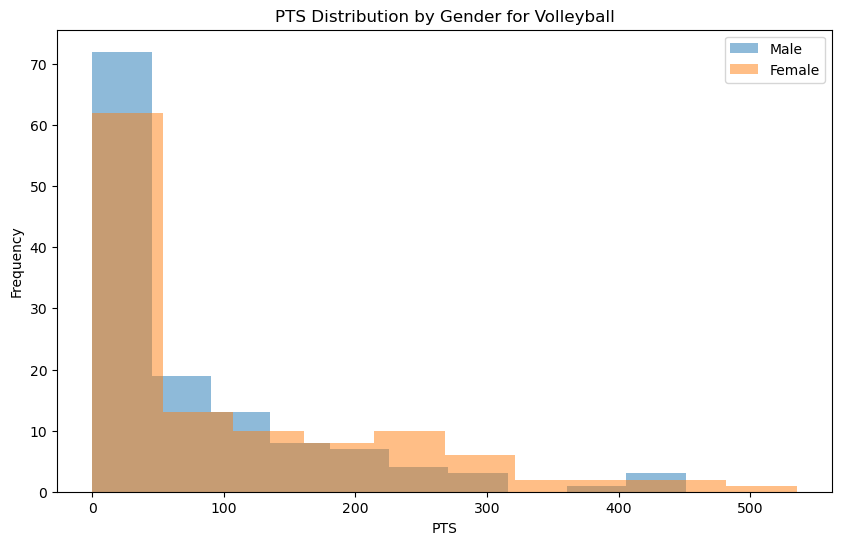

In [79]:
male_pts = volleyball[volleyball['Gender'] == 'M']['PTS']
female_pts = volleyball[volleyball['Gender'] == 'F']['PTS']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(male_pts, alpha=0.5, label='Male')
plt.hist(female_pts, alpha=0.5, label='Female')

plt.title('PTS Distribution by Gender for Volleyball')
plt.xlabel('PTS')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Overall, the 'PTS' variable has a mean of approximately 88.60 points with a standard deviation of about 109.91. When breaking this down by gender, male volleyball atheletes have a mean of 75.88 points and a standard deviation of 98.35 points. Female volleyball atheletes have a mean of 102.84 and a standard deviation of 120.41. This indicates that female athletes have a higher mean and a higher variance of points compared to male atheletes.

When looking at the distribution of points detailed on the histogram, we can see that it is skewed to the right. There are a few points that go into the 400s which can be potential outliers for both genders. From the histogram, we can see that the distribution was fairly similar between males and females. When looking at the female point distribution, more players consistently score around 100 - 300 points total. When compared to males, the number of male players who score over 100 begins to decrease. 

In [80]:
volleyball.columns

Index(['#', 'Player', 'SP', 'K', 'K/S', 'Attack E', 'Attack TA', 'Pct',
       'Set A', 'Set A/S', 'SA', 'Serve\nSE', 'SA/S', 'RE', 'DIG', 'Dig DIG/S',
       'BS', 'BA', 'Blocking BLK', 'Blocking BLK/S', 'BE', 'BHE', 'PTS',
       'Year', 'Gender'],
      dtype='object')

Blocking per set is also an important metric to evaluate atheletes' performance.

In [81]:
volleyball['Blocking BLK/S'].describe()

count    246.000000
mean       0.357195
std        0.327418
min        0.000000
25%        0.042500
50%        0.320000
75%        0.537500
max        1.460000
Name: Blocking BLK/S, dtype: float64

In [82]:
volleyball[volleyball['Gender'] == 'M']['Blocking BLK/S'].describe()

count    130.000000
mean       0.358077
std        0.328119
min        0.000000
25%        0.055000
50%        0.310000
75%        0.550000
max        1.460000
Name: Blocking BLK/S, dtype: float64

In [83]:
volleyball[volleyball['Gender'] == 'F']['Blocking BLK/S'].describe()

count    116.000000
mean       0.356207
std        0.328050
min        0.000000
25%        0.027500
50%        0.325000
75%        0.522500
max        1.340000
Name: Blocking BLK/S, dtype: float64

Male and female atheletes share similar performance in blocking per set.

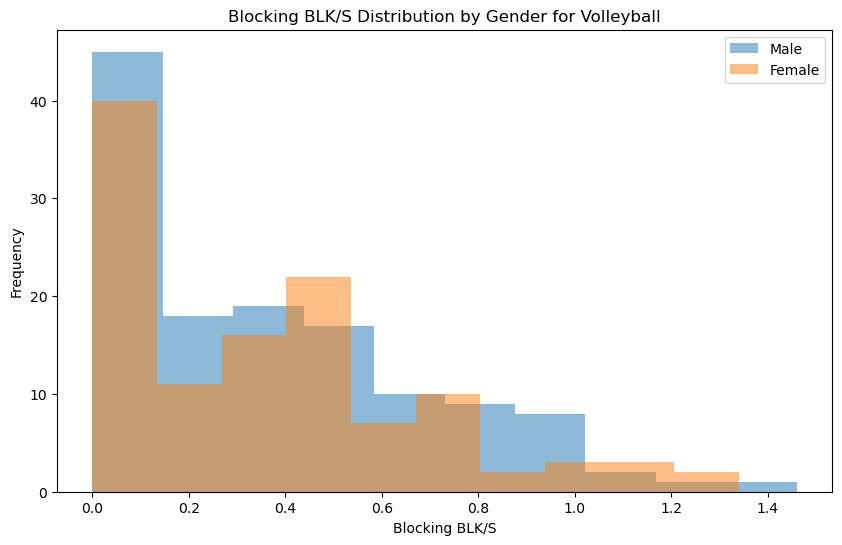

In [84]:
male_blk_s = volleyball[volleyball['Gender'] == 'M']['Blocking BLK/S']
female_blk_s = volleyball[volleyball['Gender'] == 'F']['Blocking BLK/S']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(male_blk_s, alpha=0.5, label='Male')
plt.hist(female_blk_s, alpha=0.5, label='Female')

plt.title('Blocking BLK/S Distribution by Gender for Volleyball')
plt.xlabel('Blocking BLK/S')
plt.ylabel('Frequency')
plt.legend()

plt.show()

The blocking variable has a mean of 0.357195 and standard deviation of 0.327418 across both genders. With this broken down, males blocking mean is 0.358077 with a standard devation of 0.328119. Female blocking mean is 0.356207 with a standard deviation of 0.328050. The analysis of blocking metrics reveals that men and women average very similar blockings per set. Men average slightly higher by 0.002. The absence of outliers in the data suggests a consistent range of performance across genders. When evaluating the histogram depicting the distributions of blocking per set for each gender, both genders indicate a high frequency of 0 blocks per set. Males have a higher frequency throughout the histogram besides of the peak in female blocking at 0.4. This can be due to a bigger data set for men's volleyball. 

Blocking measures a player's ability to successfully block the opponent's attacks and points represent an athlete's overall scoring performance, including both offensive and defensive contributions. When examining both metrics, for women's and men's volleyball, it reveals that female atheletes demonstrate a higher mean in terms of points compared to male atheletes. However, both genders exhibit a wide range of performance levels, with some athletes achieving significantly higher scores than others. In terms of blockings per set, male and female athletes share similar mean values (0.358 and 0.356, respectively) and standard deviations, suggesting comparable performance in this aspect of the game. 

### Section 2 of EDA - Water Polo performance

Description of points for all water polo athletes

In [85]:
waterpolo['PTS'].describe()

count    117.000000
mean      20.384615
std       22.581212
min        0.000000
25%        3.000000
50%       11.000000
75%       29.000000
max       96.000000
Name: PTS, dtype: float64

In [86]:
waterpolo[waterpolo['Gender'] == 'M']['PTS'].describe()

count    73.000000
mean     23.958904
std      24.708545
min       0.000000
25%       4.000000
50%      13.000000
75%      39.000000
max      96.000000
Name: PTS, dtype: float64

In [87]:
waterpolo[waterpolo['Gender'] == 'F']['PTS'].describe()

count    44.000000
mean     14.454545
std      17.194448
min       0.000000
25%       1.000000
50%       9.000000
75%      21.250000
max      59.000000
Name: PTS, dtype: float64

Male waterpolo athletes have a higher mean and a higher variance in points than female athletes.

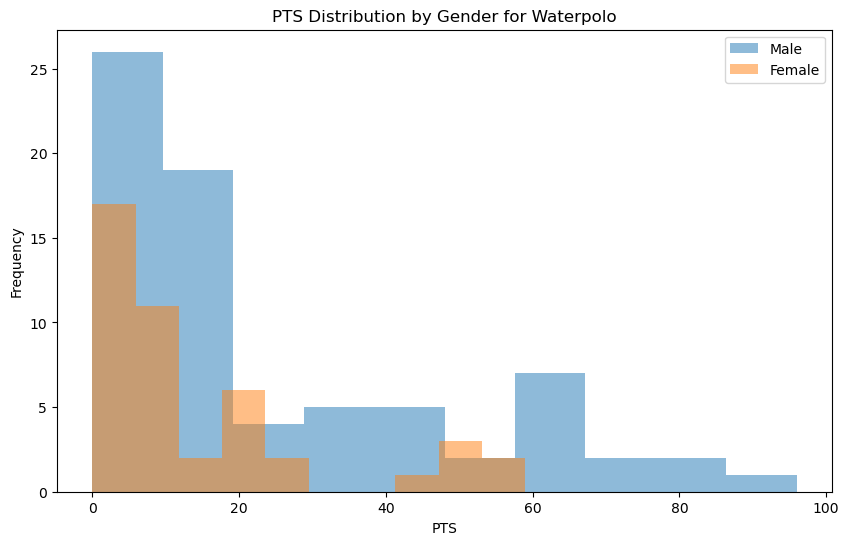

In [88]:
male_pts = waterpolo[waterpolo['Gender'] == 'M']['PTS']
female_pts = waterpolo[waterpolo['Gender'] == 'F']['PTS']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(male_pts, alpha=0.5, label='Male')
plt.hist(female_pts, alpha=0.5, label='Female')

plt.title('PTS Distribution by Gender for Waterpolo')
plt.xlabel('PTS')
plt.ylabel('Frequency')
plt.legend()

plt.show()

The analysis of the points scored by water polo athletes reveals notable differences between genders. Overall, male water polo athletes demonstrate a higher mean of 23.96 and a wider standard deviation of 24.71, indicating greater variability in performance compared to females. Female water polo athletes have a lower mean of 14.45, with a standard deviation of 17.19. By looking at the standard deviation, there is less variability in performance among female athletes since it is narrower. 

The histogram for males shows a right-skewed distribution. The highest frequency of male points falls in the 0-20 range, after which the frequency tapers off. There is a smaller peak in the 60-80 range, indicating a secondary concentration of observations in this higher points range. The distribution for females is also right-skewed but to a lesser extent. It has a peak frequency in the 0-20 points range, similar to the males but, the frequency decreases more steadily as points increase. There is a notable jump where no females scored anywhere from between roughly 25-40 points. 

Both genders have a similar shape of distribution, with the majority of both male and female athletes scoring in the lower range of PTS. The male distribution has a more pronounced right tail but this could be due to a bigger dataset for male water polo athletes. 

Shooting percentage is an important metric to evaluate athletes' performance. A higher shooting percentage is a sign of a player that frequently scores for each shot on goal they take.

In [89]:
waterpolo['SH%'].describe()

count    117.000000
mean       0.361667
std        0.230500
min        0.000000
25%        0.258000
50%        0.402000
75%        0.500000
max        1.000000
Name: SH%, dtype: float64

In [90]:
waterpolo[waterpolo['Gender'] == 'M']['SH%'].describe()

count    73.000000
mean      0.378110
std       0.226966
min       0.000000
25%       0.258000
50%       0.438000
75%       0.500000
max       1.000000
Name: SH%, dtype: float64

In [91]:
waterpolo[waterpolo['Gender'] == 'F']['SH%'].describe()

count    44.000000
mean      0.334386
std       0.236333
min       0.000000
25%       0.239500
50%       0.370500
75%       0.434750
max       1.000000
Name: SH%, dtype: float64

Male athletes have a slightly higher mean of SH% than female athletes.

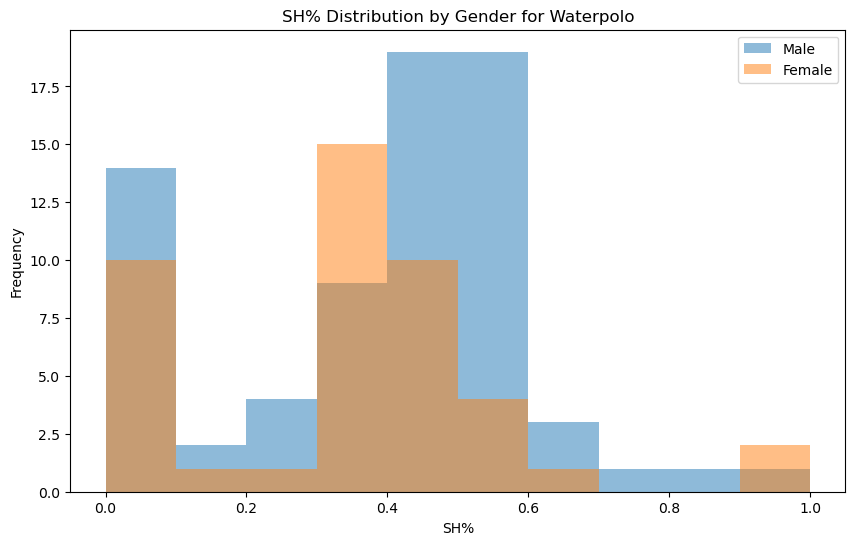

In [92]:
male_SH = waterpolo[waterpolo['Gender'] == 'M']['SH%']
female_SH = waterpolo[waterpolo['Gender'] == 'F']['SH%']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(male_SH, alpha=0.5, label='Male')
plt.hist(female_SH, alpha=0.5, label='Female')

plt.title('SH% Distribution by Gender for Waterpolo')
plt.xlabel('SH%')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Overall, water polo athletes exhibit a mean shooting percentage of approximately 0.361, with male athletes showing a slightly higher mean SH% of 0.378 compared to female athletes' mean of 0.334. Both genders have similar standard deviations men at 0.226966 and females at 0.236333. 

The histogram for male water polo athletes shows a somewhat bimodal distribution with peaks in the lower 20% and a slight peak at around 60%. Similarly, the female distribution shows a peak in the lower 20% ranges but has less pronounced peaks throughout the rest of the histogram. Female 

### Section 3 of EDA - Soccer performance

In [93]:
soccer['PTS'].describe()

count    452.000000
mean       3.811947
std        5.806758
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       41.000000
Name: PTS, dtype: float64

In [94]:
soccer[soccer['Gender'] == 'M']['PTS'].describe()

count    184.000000
mean       2.934783
std        4.319999
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       26.000000
Name: PTS, dtype: float64

In [95]:
soccer[soccer['Gender'] == 'F']['PTS'].describe()

count    268.000000
mean       4.414179
std        6.577975
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       41.000000
Name: PTS, dtype: float64

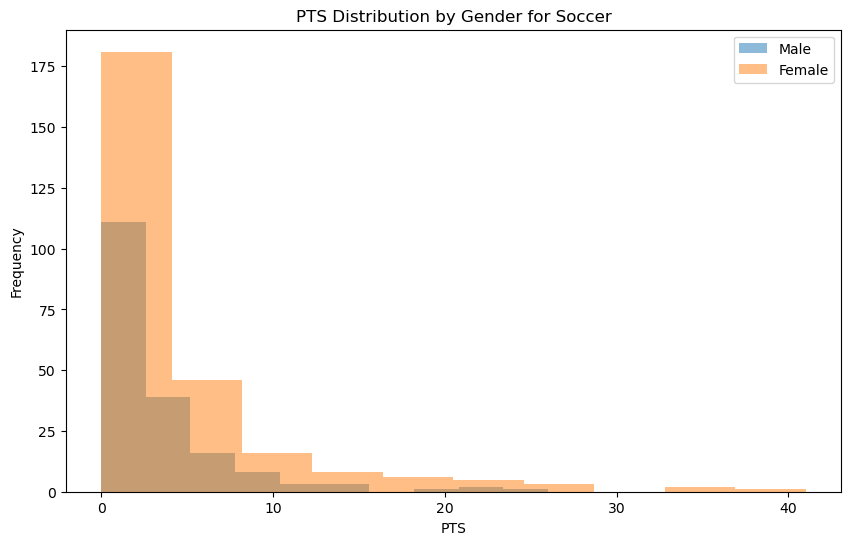

In [96]:
s_male_pts = soccer[soccer['Gender'] == 'M']['PTS']
s_female_pts = soccer[soccer['Gender'] == 'F']['PTS']

# Plot Histograms
plt.figure(figsize = (10, 6))

plt.hist(s_male_pts, alpha = 0.5, label = 'Male')
plt.hist(s_female_pts, alpha = 0.5, label = 'Female')

plt.title('PTS Distribution by Gender for Soccer')
plt.xlabel('PTS')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Soccer athletes at UCSD score a mean of 3.81 points across genders with a standard deviation of 5.81. When analyzing this across genders, male soccer players have a mean of 2.93 and a standard deviation of 4.32. Female soccer players have a mean of 4.41 and standard deviation of 6.58. 

The histogram generated to analyze the distribution of male points and female points scored is skewed to the right. The distribution of of points scored by males and females share similar shapes. They both peak at around 0-5 points and slowly decrease from there. The frequency of males is significantly smaller than the frequency of females. The frequency of females also trails off at a slower rate than for males. On average, female players score more points than male players. However, this observation does not necessarily imply causality between gender and the number of points scored. In terms of outliers, some potential outliers could be players that score around 40 points given that the average is around 5 for females and 3 for males. 

In addition to analyzing the points scored by players, we will analyze SOG% (shots on goal percentages) which indiate the number of shots that would have been a goal if it wasn't blocked. 

In [97]:
soccer['SOG%'].describe()

count    451.000000
mean       0.335306
std        0.276075
min        0.000000
25%        0.000000
50%        0.353000
75%        0.500000
max        1.000000
Name: SOG%, dtype: float64

In [98]:
soccer[soccer['Gender'] == 'M']['SOG%'].describe()

count    184.000000
mean       0.282533
std        0.265131
min        0.000000
25%        0.000000
50%        0.286000
75%        0.455000
max        1.000000
Name: SOG%, dtype: float64

In [99]:
soccer[soccer['Gender'] == 'F']['SOG%'].describe()

count    267.000000
mean       0.371674
std        0.278073
min        0.000000
25%        0.167000
50%        0.400000
75%        0.500000
max        1.000000
Name: SOG%, dtype: float64

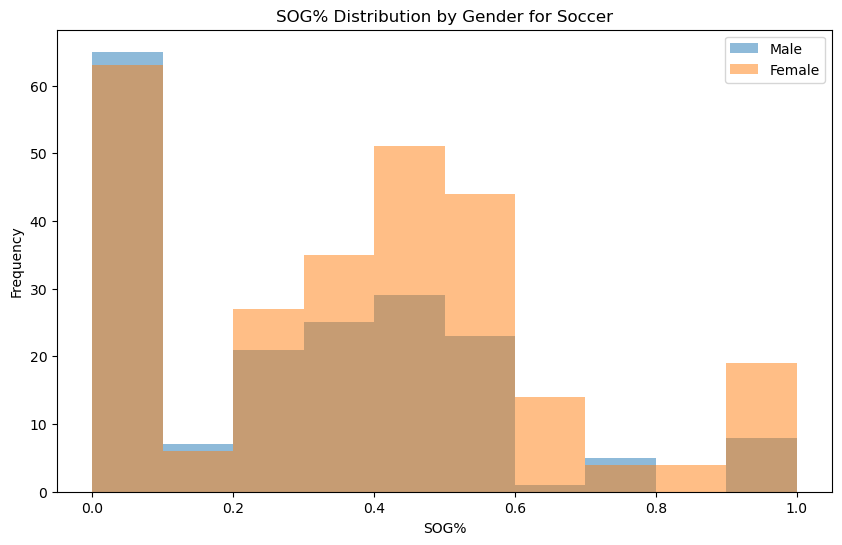

In [100]:
s_male_SOG = soccer[soccer['Gender'] == 'M']['SOG%']
s_female_SOG = soccer[soccer['Gender'] == 'F']['SOG%']

#plot histograms
plt.figure(figsize = (10, 6))

plt.hist(s_male_SOG, alpha=0.5, label='Male')
plt.hist(s_female_SOG, alpha= 0.5, label = 'Female')

plt.title('SOG% Distribution by Gender for Soccer')
plt.xlabel('SOG%')
plt.ylabel('Frequency')
plt.legend()

plt.show()

The mean SOG% between genders is 34% and the standard devation is 28%. When analyzing the distribution across genders, male soccer players have a mean of 28% and a standard deviation of 27%. Similarly, female players exhibit a mean of 37% and a standard deviation of 28%. 

When analyzing the distribution through a histogram, we see a noticiable peak at 0 for both females and males indicating a 0% of no shot on goals for both genders. There is a somewhat unimodal distribution across both genders with females having a higher frequency. There is a center peak for both genders at 0.4 SOG and tails off from there. Given that the SOG% can range from 0% to 100%, the values at 0% and 1.000% are not necessarily outliers. 

To compare soccer points and shots on goal percentage (SOG%) across genders, we can look at their distributions. Female soccer players have a higher average number of points (4.414) compared to male players (2.935). Both point distributions are fairly similar as they are both right skewed, but women show a higher frequency and tends to tail off slower. In addition, female soccer players also have a higher average SOG% (0.372) compared to male players (0.283). In both points and SOG%, female players have higher means than male players, suggesting that, on average, female players might be scoring more points and having a higher SOG%. This can suggest that female soccer players score more points and are more accurate shooters than males. 

### Section 4 of EDA - Basketball performance

In [110]:
basketball.head()

,#,Player,GP-GS,MIN,AVG,FG FG-FGA,FG%,3PT\n3FG-FGA,3FG%,FT FT-FTA,...,PF,DQ,A,TO,BLK,STL,PTS,AVG.2,Year,Gender
0,13,"Klie, Adam",33-33,1048,31.8,188-373,0.504,23-52,0.442,111-187,...,94,3,154,74,6,26,510,15.5,2016,M
1,44,"Hansen, Chris",31-30,700,22.6,143-283,0.505,18-44,0.409,83-95,...,69,0,21,51,22,5,387,12.5,2016,M
2,14,"Oshita, Christian",33-33,868,26.3,126-268,0.470,52-123,0.423,56-73,...,102,4,34,38,4,11,360,10.9,2016,M
3,1,"Lipovic, Aleks",25-18,537,21.5,71-162,0.438,63-145,0.434,17-19,...,41,0,40,14,2,10,222,8.9,2016,M
4,11,"Everman, Scott",33-5,623,18.9,79-182,0.434,52-133,0.391,29-31,...,48,1,18,24,8,13,239,7.2,2016,M


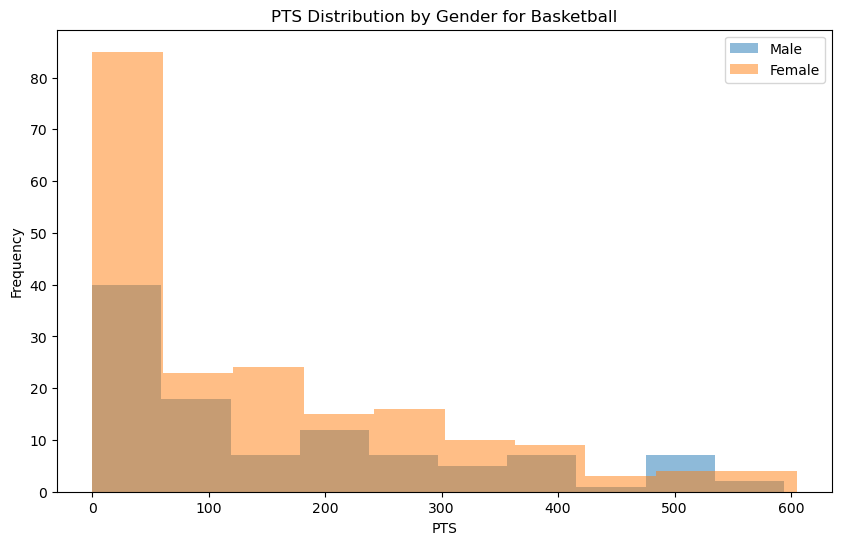

In [102]:
b_male_pts = basketball[basketball['Gender'] == 'M']['PTS']
b_female_pts = basketball[basketball['Gender'] == 'F']['PTS']

# Plot Histograms
plt.figure(figsize = (10, 6))

plt.hist(b_male_pts, alpha = 0.5, label = 'Male')
plt.hist(b_female_pts, alpha = 0.5, label = 'Female')

plt.title('PTS Distribution by Gender for Basketball')
plt.xlabel('PTS')
plt.ylabel('Frequency')
plt.legend()

plt.show()

<Axes: xlabel='Gender', ylabel='PTS'>

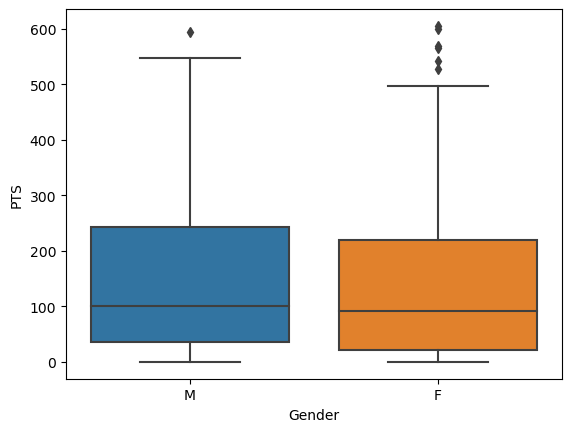

In [105]:
sns.boxplot(data = basketball, y = 'PTS', x = 'Gender')

There are some outliers

<Axes: xlabel='FG%', ylabel='3FG%'>

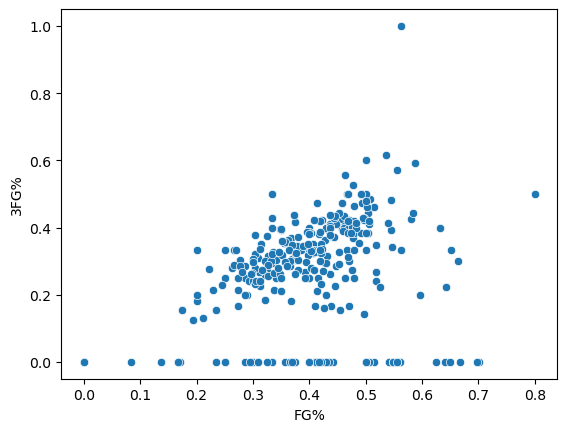

In [118]:
sns.scatterplot(basketball, x = 'FG%', y = '3FG%') # relationship between FG% and 3FG%

### Section 5 of EDA - on Athlete Bio Data

# Ethics & Privacy

All of the data used in this project is publicly available information found on UCSD’s official athletics website. Nowhere in UCSD’s athletics website’s Terms of Service (which is run by SIDEARM Sports) or in any other of UCSD’s websites does it prohibit the use of this publicly available data. Furthermore, we have reached out to and met with UCSD Athletics to discuss our project. In our meeting with them, we ensured our practices were ethical and data used was accurate. The data used in our analysis is quantitative, directly from UCSD, thus there will be no room for personal biases. A few sports lacked the factors necessary for our analysis, so we have omitted them, only using complete data. Additionally, we will omit the names of athletes in our project as it is irreverent to the task we seek to accomplish.

An unintended consequence of our analysis may be our audience’s interpretation of our results negatively impacting their choice of university. If the audience views the factors we have deemed significant as unfit or unrealistic for them and their college experiences, then they may opt for another university elsewhere. Even those who attend UCSD may find the results to be negatively impactful to their emotional wellbeing if they do not believe they fit any of the factors found to be significant, therefore ruining their dreams of playing college sports.

Unfortunately, there is nothing we can do about these unintended consequences. While we would love for there to be no potential negative effects our analysis may cause, these unintended consequences are ultimately based on our audience’s interpretation of our results and are therefore out of our control.

# Team Expectations 

* Meet weekly on Zoom (usually on weekends)
* Meet up in person every other week
* Communicate throughout the week in our Instagram group chat to give project updates
* Respond to each other's messages within 24 hours

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/7  |  3 PM | Brainstorm research topics and ideas for a research question  | Pick a research topic and question | 
| 2/8  |  5 PM |  Do background research on topic; write background, data, and ethics and privacy sections  | Write research question and hypothesis sections and finalize the rest of our project proposal | 
| 2/20  | 7 PM  | Research relevant data sets  | Finalize project data sets; wrangle data sets into a tidy format   |
| 2/24  | 7 PM  | Write data checkpoint #1 sections | Review/edit checkpoint #1 sections; make sure data is tidy   |
| 2/29  | 7 PM  | Review data | Conduct EDA |
| 3/9  | 7 PM  | Write data checkpoint #2 sections| Review/edit checkpoint #2 sections; go over EDA to make sure we're all on the same page |
| 3/14  | 7 PM  | Work on final video logistics - how to present and designating roles | Film final video |
| 3/19  | Before 11:59 PM  | Review entire project; make final edits | Turn in final report and final video |